In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("C:/Users/PRAMILA/ML_DATAFILE_TITAS_Sir/raindata.csv")# import the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [4]:
df.isna().sum()/df.shape[0]# checking the null percentages

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.009888
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64

#### * four columns named Evaporation Sunshine Cloud9am and Cloud3pm contain high percentage of null value

In [5]:
df.shape  # dimension of the dataset  

(142193, 24)

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
df.drop("RISK_MM",axis=1,inplace=True)  # from the dataset information file it was found that this column should be droped

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

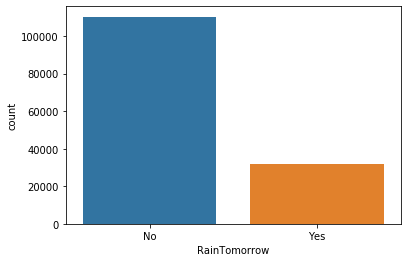

In [8]:
sns.countplot(x = "RainTomorrow",data = df)
df['RainTomorrow'].value_counts()/df.shape[0]        # distribution of the values of Raintomorrow                 

#### * Month is extracted from the Date column and Date column is droped 

In [9]:
def split_date(str,sep = "-"):
    splitted = str.split(sep)
    return splitted[1]
df["Month"] = df.Date.apply(split_date)
df.drop(['Date'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null obje

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


#### *  The std of Rainfall column is greater than the mean......to handle this this column is made discrete.....

In [12]:
df.Rainfall.describe()

count    140787.000000
mean          2.349974
std           8.465173
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

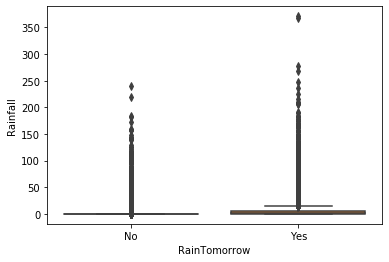

In [13]:
sns.boxplot(x = "RainTomorrow",y = "Rainfall",data = df) 

In [14]:
df.Rainfall.value_counts() # Most of the value are 0

0.0      90275
0.2       8685
0.4       3750
0.6       2562
0.8       2028
         ...  
74.4         1
60.6         1
7.9          1
145.6        1
128.2        1
Name: Rainfall, Length: 679, dtype: int64

In [15]:
def binning(col,points,value):
    minval  = [-3]
    maxval = [col.max()]
    segment = minval + points + maxval
    new = pd.cut(col,bins = segment,labels = value,include_lowest = True)
    return new

In [16]:
df.Rainfall.fillna(-2,inplace=True) # replace the null values with -2

In [17]:
points = [-1,.001,.8]
value=  [0,1,2,3]
df["Rainfall"] = binning(df["Rainfall"],points,value) # bins are made for the Rainfall column and this also treated the null values as 

In [18]:
df.Rainfall.value_counts()

1    90275
3    33217
2    17295
0     1406
Name: Rainfall, dtype: int64

In [19]:
df_rain = pd.crosstab(index=df["Rainfall"],columns=df["RainTomorrow"],normalize="index")
df_rain # distribution of Rainfall wrt RainTomorrow

RainTomorrow,No,Yes
Rainfall,,
0,0.519203,0.480797
1,0.869709,0.130291
2,0.752009,0.247991
3,0.543908,0.456092


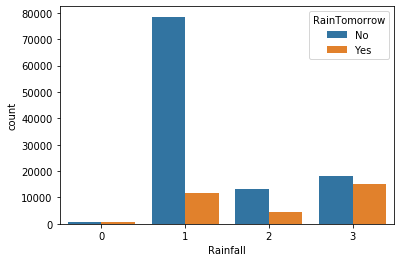

In [20]:
sns.countplot(hue = "RainTomorrow", x = "Rainfall",data = df)

### To deal with the high percentage of the null values in the previously mentioned columns, the columns are made discrete where null values are treated as a seperate category.

RainTomorrow,No,Yes
Evaporation,,
0,0.769604,0.230396
1,0.706439,0.293561
2,0.760680,0.239320
3,0.843110,0.156890


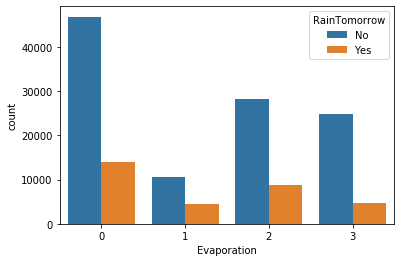

In [21]:
df.Evaporation.fillna(-2,inplace = True)
points = [-1,2,6]
value=  [0,1,2,3]
df["Evaporation"] = binning(df["Evaporation"],points,value)
sns.countplot(x = df.Evaporation,data = df,hue = "RainTomorrow")
df_Eva = pd.crosstab(index=df["Evaporation"],columns=df["RainTomorrow"],normalize="index")
df_Eva # distribution of Evaporation column afted bining

RainTomorrow,No,Yes
Sunshine,,
0,0.777987,0.222013
1,0.478778,0.521222
2,0.694279,0.305721
3,0.926210,0.073790


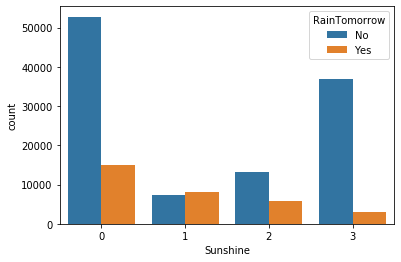

In [22]:
df.Sunshine.fillna(-2,inplace = True)
points = [-1,4,8]
value=  [0,1,2,3]
df["Sunshine"] = binning(df["Sunshine"],points,value)
sns.countplot(x = df.Sunshine,data = df,hue = "RainTomorrow")
df_Sun = pd.crosstab(index=df["Sunshine"],columns=df["RainTomorrow"],normalize="index")
df_Sun # distribution of Sunshine column after binning

RainTomorrow,No,Yes
Cloud3pm,,
0,0.797019,0.202981
1,0.943386,0.056614
2,0.804238,0.195762
3,0.562049,0.437951


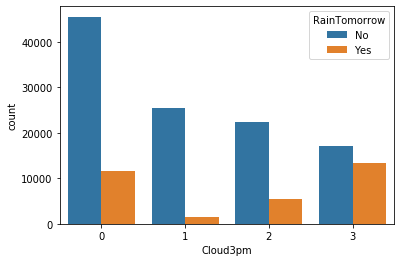

In [23]:
df.Cloud3pm.fillna(-2,inplace = True)
points = [-1,2,6]
value=  [0,1,2,3]
df["Cloud3pm"] = binning(df["Cloud3pm"],points,value)
sns.countplot(x = df.Cloud3pm,data = df,hue = "RainTomorrow")
df_c3 = pd.crosstab(index=df["Cloud3pm"],columns=df["RainTomorrow"],normalize="index")
df_c3 # distribution of Cloud3pm column after binning

RainTomorrow,No,Yes
Cloud3pm,,
0,0.797019,0.202981
1,0.943386,0.056614
2,0.804238,0.195762
3,0.562049,0.437951


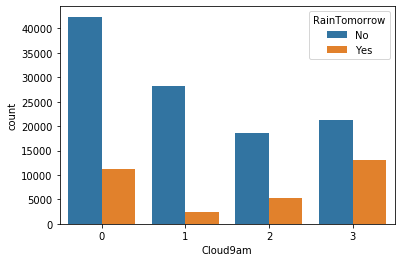

In [24]:
df.Cloud9am.fillna(-2,inplace = True)
points = [-1,2,6]
value=  [0,1,2,3]
df["Cloud9am"] = binning(df["Cloud9am"],points,value)
sns.countplot(x = df.Cloud9am,data = df,hue = "RainTomorrow")
df_c9 = pd.crosstab(index=df["Cloud3pm"],columns=df["RainTomorrow"],normalize="index")
df_c9 # distribution of Cloud9am after binning 

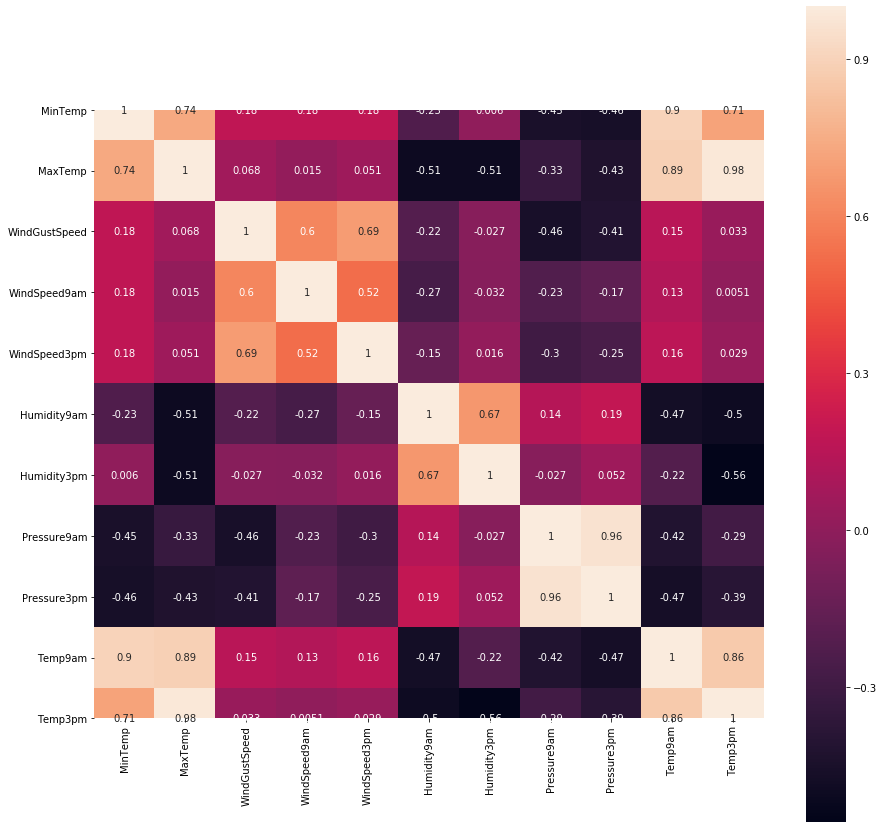

In [25]:
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, square=True)
plt.show() # checking the corr of the continuous column

#### 1. Pressure3pm and Pressure9am are highly correlated. 2. MinTemp id highly correlated with Temp9am , MaxTemp is highly correlated with Temp3pm and again Temp9am is highly          correlated with Temp3pm.

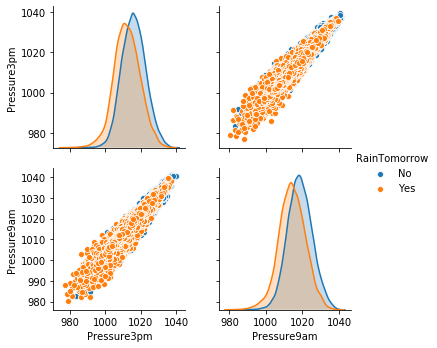

In [26]:
sns.pairplot(data = df , x_vars = ["Pressure3pm","Pressure9am"], y_vars = ["Pressure3pm","Pressure9am"],hue  = "RainTomorrow")

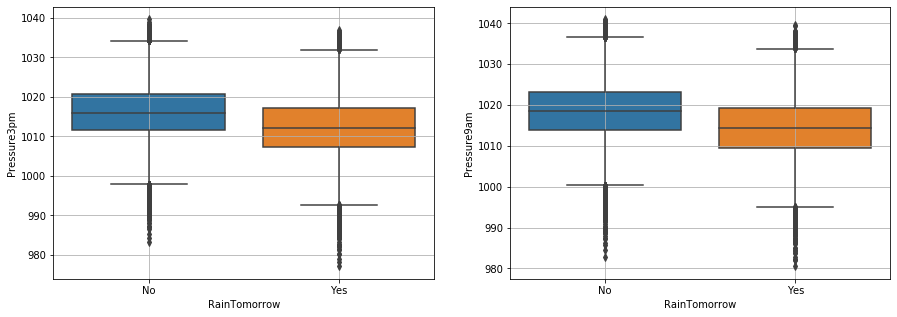

In [27]:
cols =  ["Pressure3pm","Pressure9am"]
plt.figure(figsize=(15,5))
for i,col in enumerate(cols):    
    plt.subplot(1,2,i+1)
    sns.boxplot(y=col,x="RainTomorrow",data=df)
    plt.grid()

#### As the distribution is quiet similar wrt RainTomorrow one of these two columns can be droped.

In [28]:
df.drop("Pressure9am",axis=1,inplace=True)

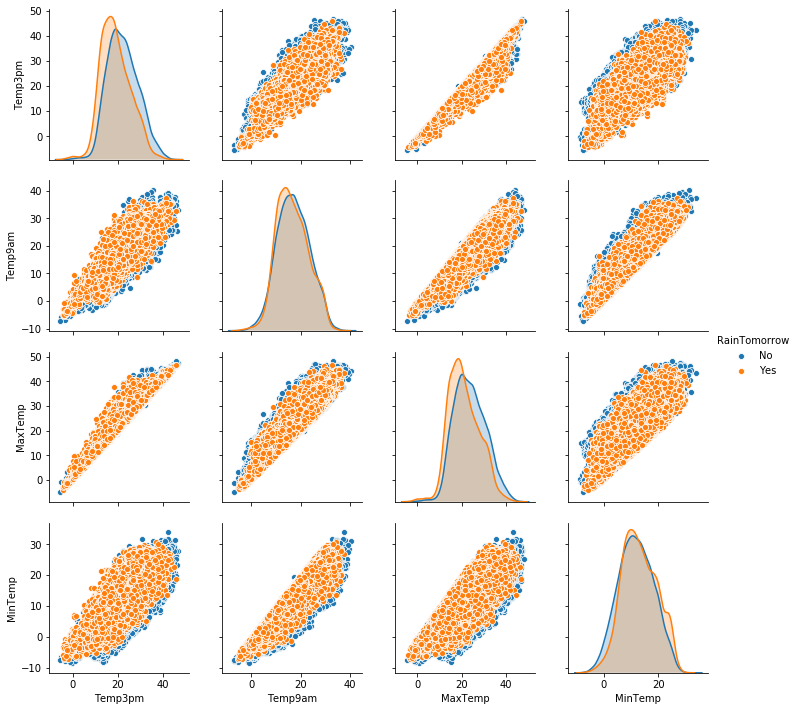

In [29]:
sns.pairplot(data = df , x_vars = ["Temp3pm","Temp9am","MaxTemp","MinTemp"], y_vars =["Temp3pm","Temp9am","MaxTemp","MinTemp"],hue  = "RainTomorrow")

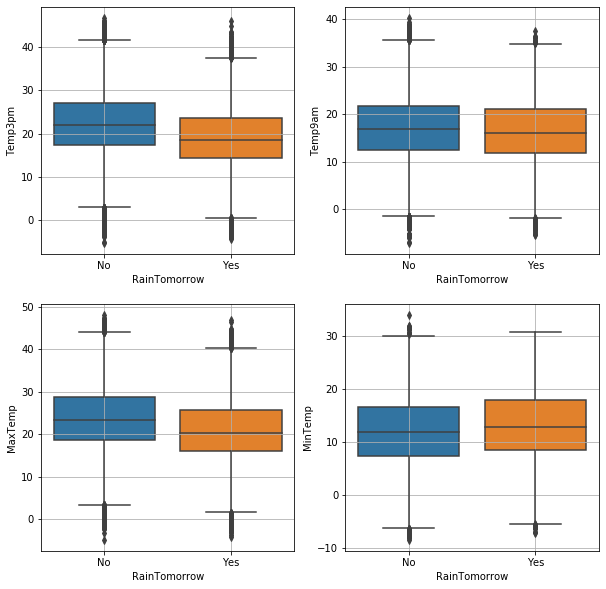

In [30]:
cols =  ["Temp3pm","Temp9am","MaxTemp","MinTemp"]
plt.figure(figsize=(10,10))
for i,col in enumerate(cols):    
    plt.subplot(2,2,i+1)
    sns.boxplot(y=col,x="RainTomorrow",data=df)
    
    plt.grid()

#### One interesting point is that incase of RainTomorrow = "Yes" the median MinTemp is slightly higher.

In [31]:
df.drop(["Temp9am","Temp3pm"],axis=1,inplace=True) # due to similar reason these two columns are droped

In [32]:
continuous_feature = [col for col in df.columns if df[col].dtypes == 'float64']
continuous_feature # list of continuous column

['MinTemp',
 'MaxTemp',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm']

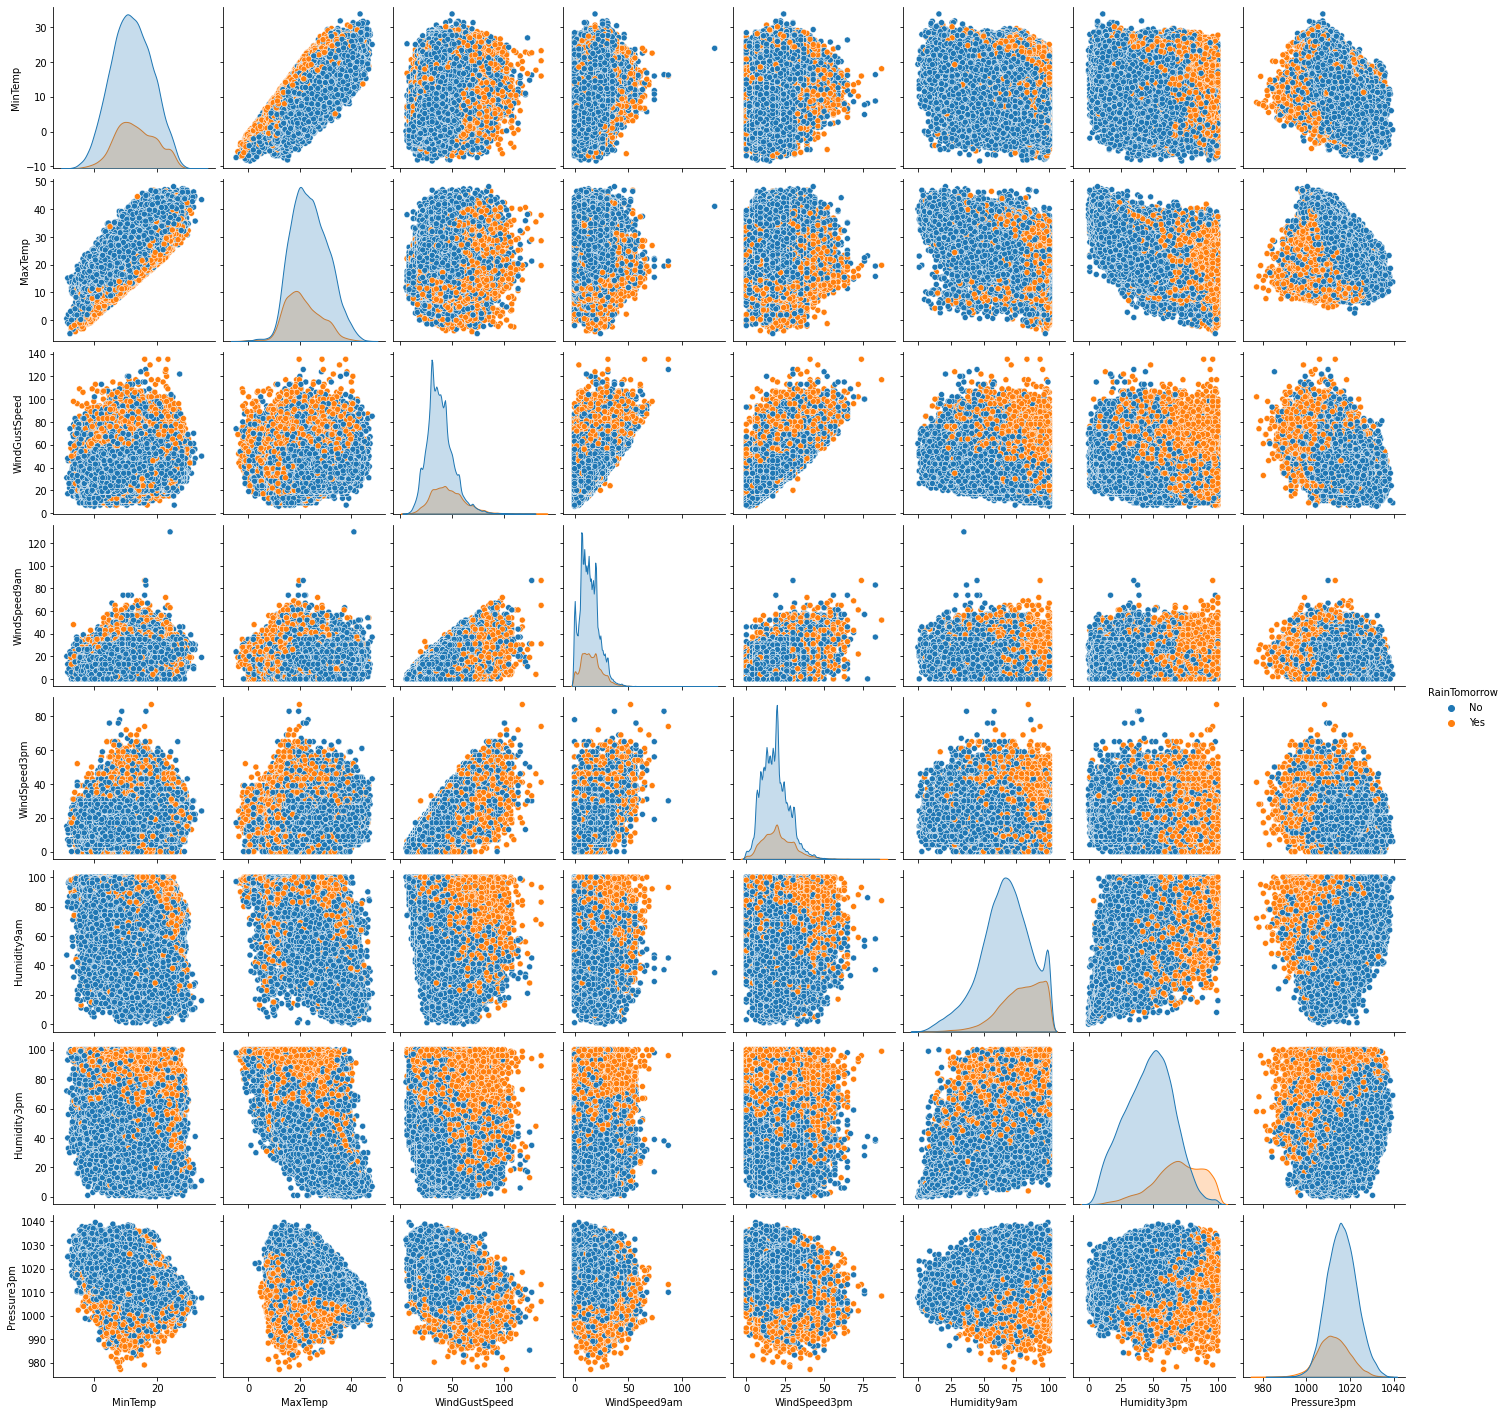

In [113]:
sns.pairplot(data = df , x_vars = continuous_feature, y_vars = continuous_feature ,hue  = "RainTomorrow")

### Humidity3pm and Humidity9am both are higher incase of RainTomorrow = "Yes"

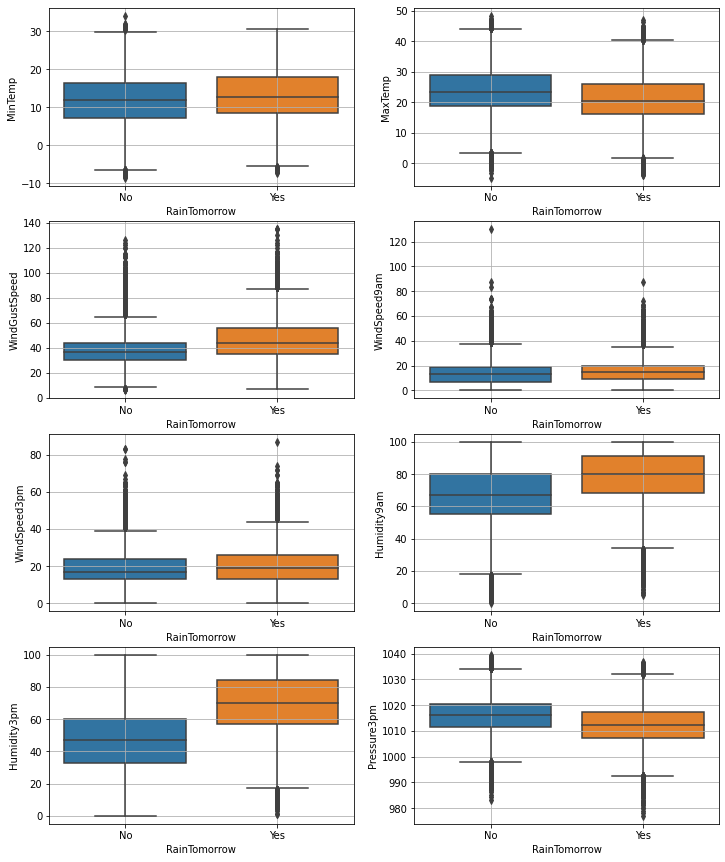

In [114]:

plt.figure(figsize=(12,15))
for i,col in enumerate(continuous_feature):    
    plt.subplot(4,2,i+1)
    sns.boxplot(y=col,x="RainTomorrow",data=df)
    
    plt.grid()

#### median value of Pressure3pm is lower and WindGustSpeed is higher incase of RainTomorrow = "Yes"

In [33]:
cat_feature = [col for col in df.columns if df[col].dtypes != 'float64']
cat_feature # list of categorical column

['Location',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow',
 'Month']

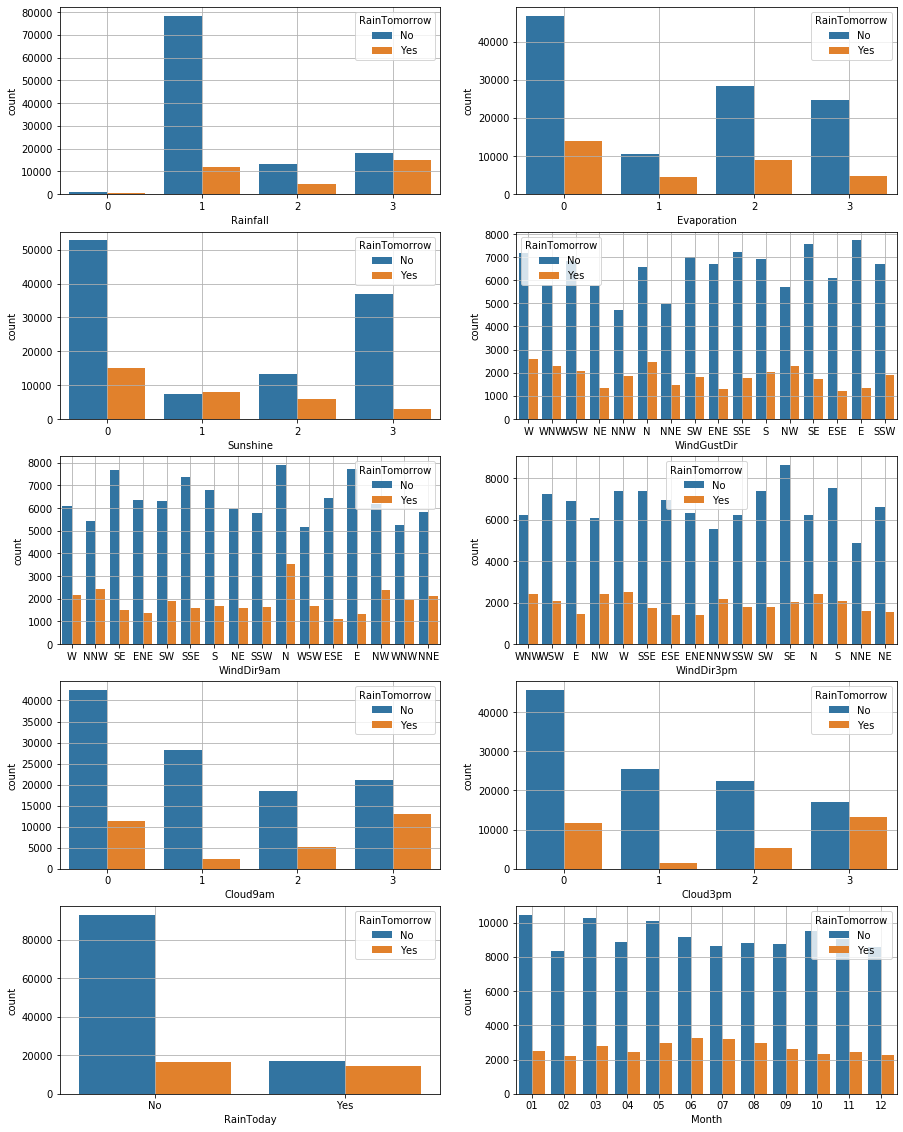

In [34]:
cat = cat_feature[1:]
cat.remove("RainTomorrow")
plt.figure(figsize=(15,20))
for i,col in enumerate(cat):    
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[col],hue="RainTomorrow",data=df)
    
    plt.grid()

#### It is found that incase of Cloud9am ,Cloud3pm = 3 and RainToday = Yes the chance of getting RainTomorrow = "Yes " is higher

In [35]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure3pm      13981
Cloud9am             0
Cloud3pm             0
RainToday         1406
RainTomorrow         0
Month                0
dtype: int64

In [36]:
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x : 1 if x == 'Yes' else 0)# Encoding the target column

### OHE for discrete columns treating NAN values as separate category 

In [37]:
dfohe=pd.get_dummies(df,columns=["Evaporation","Sunshine","Cloud3pm","Cloud9am","Location","WindGustDir","WindDir9am","WindDir3pm","Month","Rainfall","RainToday"],drop_first = True,dummy_na= True )

In [38]:
dfohe.shape

(142193, 140)

In [39]:
numcol = [col for col in dfohe.columns if dfohe[col].dtypes == 'float64']
numcol

['MinTemp',
 'MaxTemp',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm']

In [40]:
dfohe_1 = dfohe[dfohe["RainTomorrow"] ==1]
dfohe_0 = dfohe[dfohe["RainTomorrow"] ==0]
for col in numcol:
    dfohe_0[col].fillna(dfohe_0[col].median(),inplace = True)
    
for col in numcol:
    dfohe_1[col].fillna(dfohe_1[col].median(),inplace = True)

dfohe = pd.concat([dfohe_0,dfohe_1])
# replacing the NAN value with median in case of continuous columns

C:\Users\subha\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
dfohe.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainTomorrow,Evaporation_1.0,...,Month_10,Month_11,Month_12,Month_nan,Rainfall_1.0,Rainfall_2.0,Rainfall_3.0,Rainfall_nan,RainToday_Yes,RainToday_nan
0,13.4,22.9,44.0,20.0,24.0,71.0,22.0,1007.1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,7.4,25.1,44.0,4.0,22.0,44.0,25.0,1007.8,0,0,...,0,0,1,0,1,0,0,0,0,0
2,12.9,25.7,46.0,19.0,26.0,38.0,30.0,1008.7,0,0,...,0,0,1,0,1,0,0,0,0,0
3,9.2,28.0,24.0,11.0,9.0,45.0,16.0,1012.8,0,0,...,0,0,1,0,1,0,0,0,0,0
4,17.5,32.3,41.0,7.0,20.0,82.0,33.0,1006.0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
dfohe.isna().sum() # checking the null percentage

MinTemp          0
MaxTemp          0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
                ..
Rainfall_2.0     0
Rainfall_3.0     0
Rainfall_nan     0
RainToday_Yes    0
RainToday_nan    0
Length: 140, dtype: int64

### ditribution of value of continous columns in ohe dataset

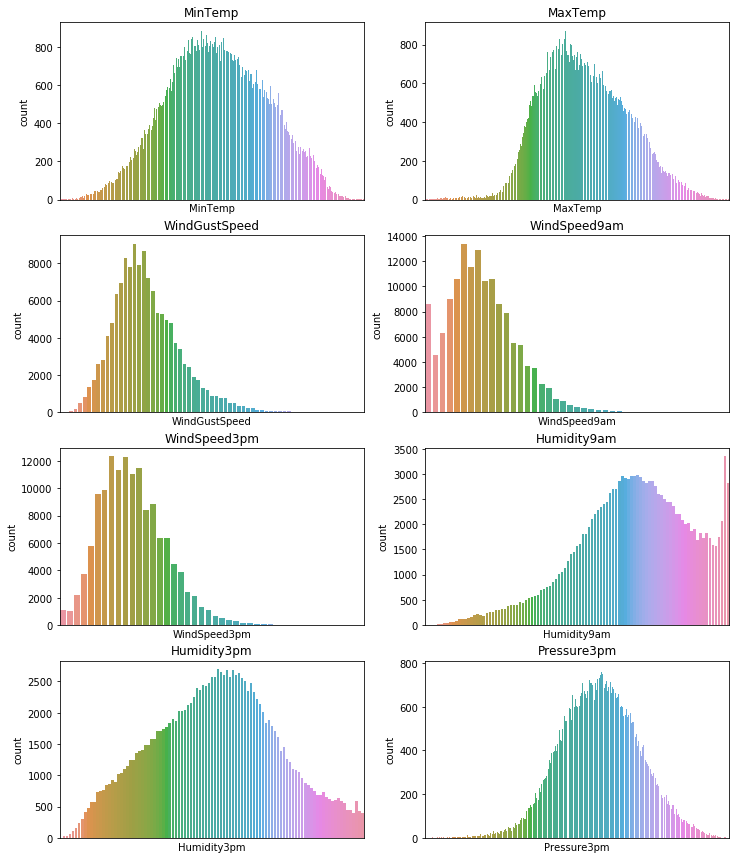

In [43]:
plt.figure(figsize=(12,15))
for i,col in enumerate(continuous_feature):    
    plt.subplot(4,2,i+1)
    sns.countplot(x = col,data = df)
    plt.title(col)
    plt.xticks(ticks = [])
    
    

## Train - Test split

In [44]:
X = dfohe.drop(['RainTomorrow'], axis=1)

y = dfohe['RainTomorrow']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
numerical = [col for col in X_train.columns if X_train[col].dtypes == 'float64'] # continuous  columns in X_train

## Outliers

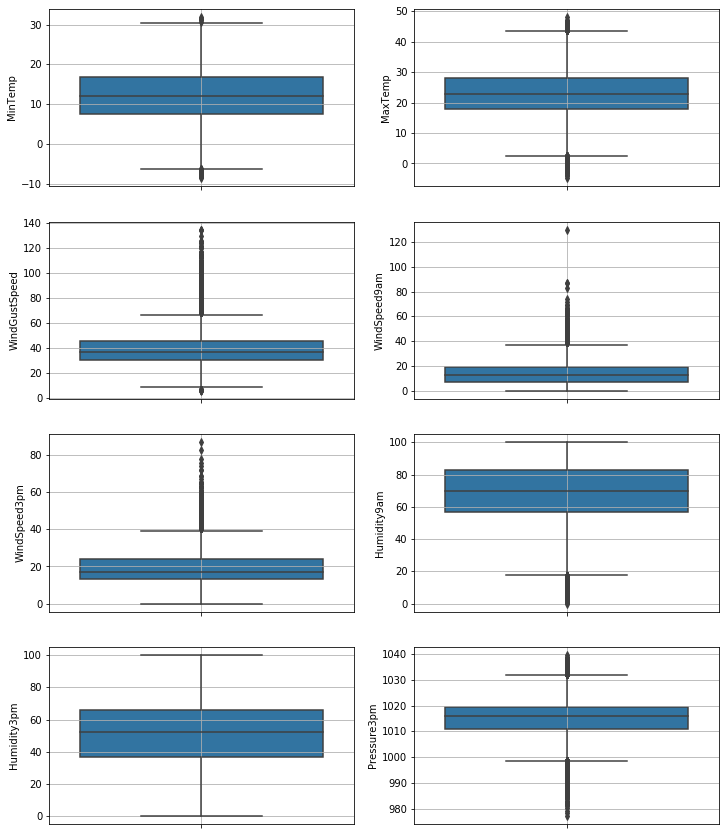

In [47]:
plt.figure(figsize=(12,15))
for i,col in enumerate(continuous_feature):    
    plt.subplot(4,2,i+1)
    sns.boxplot(y = col,data=X_train)
    
    plt.grid()

## In the X_train the outliers must be replaced with th_max and th_min values

In [48]:
def capping(df, cols, factor=1.5):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        th_high = q3 + (factor*iqr)
        th_low = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>th_high, th_high,
                df[col])
        df[col] = np.where(df[col]<th_low, th_low, df[col]) ## capping function

In [49]:
capping(X_train, numerical, factor=1.5)

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


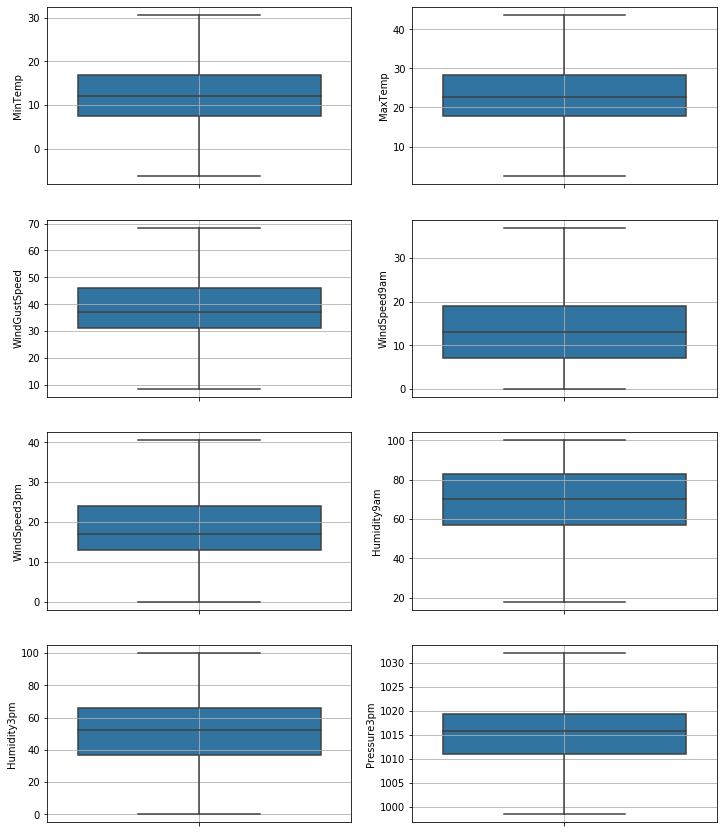

In [50]:
plt.figure(figsize=(12,15))
for i,col in enumerate(continuous_feature):    
    plt.subplot(4,2,i+1)
    sns.boxplot(y = col,data=X_train)
    
    plt.grid()

In [51]:
final_col = [col for col in dfohe.columns if dfohe[col].dtypes == 'float64']
final_col

['MinTemp',
 'MaxTemp',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm']

## Scaling the data

In [52]:
scaler = preprocessing.StandardScaler()

X_train[final_col] = scaler.fit_transform(X_train[final_col])

X_test[final_col] = scaler.transform(X_test[final_col]) ## standard scaler is applied on the continuous columns

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\subha\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [53]:
X_train.head()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Evaporation_1.0,Evaporation_2.0,...,Month_10,Month_11,Month_12,Month_nan,Rainfall_1.0,Rainfall_2.0,Rainfall_3.0,Rainfall_nan,RainToday_Yes,RainToday_nan
2330,-1.311012,-1.146620,-0.702947,-0.573152,0.055885,1.600121,0.316582,-0.559617,0,0,...,0,0,0,0,1,0,0,0,0,0
113340,-0.919189,-0.878411,0.852575,-1.158079,-0.417775,1.387423,0.365178,0.583031,0,0,...,0,0,0,0,0,0,1,0,1,0
107979,-0.213907,-0.680783,0.361357,-0.339181,-0.654605,0.164409,0.219388,-1.854618,0,1,...,0,0,0,0,0,0,1,0,1,0
111105,-0.386310,0.137960,0.852575,0.596702,1.121620,-0.526860,-0.023595,0.933443,0,0,...,0,0,0,0,1,0,0,0,0,0
20433,1.228001,0.377936,0.525096,0.713688,1.713696,0.058060,0.705354,0.232619,0,0,...,0,0,1,0,1,0,0,0,0,0


# Logistic Regression Model

In [54]:
from sklearn import linear_model # linear_model == submodule of sklearn
from sklearn import model_selection 
from sklearn import metrics

model=linear_model.LogisticRegression()

model.fit(X_train,y_train)

trainp=model.predict(X_train)
testp=model.predict(X_test)

print("acc train",metrics.accuracy_score(y_train,trainp))

print("acc test",metrics.accuracy_score(y_test,testp))

print("recall train",metrics.recall_score(y_train,trainp))

print("recall test",metrics.recall_score(y_test,testp))

print("pres train",metrics.precision_score(y_train,trainp))

print("pres test",metrics.precision_score(y_test,testp))

print("conf test",metrics.confusion_matrix(y_test,testp))

print("conf train",metrics.confusion_matrix(y_train,trainp))

print("auc train",metrics.roc_auc_score(y_train,trainp))

print("auc test",metrics.roc_auc_score(y_test,testp))

print("f1 score ",metrics.f1_score(y_train,trainp)) 

print("f1 score test",metrics.f1_score(y_test,testp))

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


acc train 0.8536227297501626
acc test 0.8540736312809873
recall train 0.5436507936507936
recall test 0.5491050583657587
pres train 0.7331637789434642
pres test 0.7379209370424598
conf test [[20761  1253]
 [ 2897  3528]]
conf train [[83266  5036]
 [11615 13837]]
auc train 0.7433096214182713
auc test 0.7460933668316484
f1 score  0.6243429216018049
f1 score test 0.6296626807067642


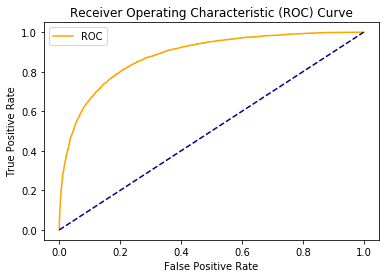

In [60]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

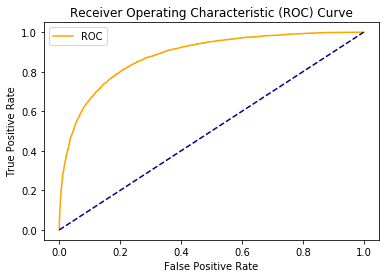

# Feature Selection(RFE)

In [137]:
from sklearn import feature_selection

logreg=linear_model.LogisticRegression()
rfeobj=feature_selection.RFE(logreg,20)

rfeobj.fit(X_train,y_train)
cols = X_train.columns[rfeobj.support_]
cols

D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_F

D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_F

D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_F

D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\EXC_F

Index(['WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'Sunshine_3.0',
       'Location_Ballarat', 'Location_GoldCoast', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston',
       'Location_MelbourneAirport', 'Location_MountGinini', 'Location_Nhil',
       'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Sale',
       'Location_Townsville', 'Location_Wollongong', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'RainToday_nan'],
      dtype='object')

In [138]:
model=linear_model.LogisticRegression()

model.fit(X_train[cols],y_train)

trainp=model.predict(X_train[cols])
testp=model.predict(X_test[cols])

print("acc train",metrics.accuracy_score(y_train,trainp))

print("acc test",metrics.accuracy_score(y_test,testp))
print("recall train",metrics.recall_score(y_train,trainp))

print("recall test",metrics.recall_score(y_test,testp))

print("pres train",metrics.precision_score(y_train,trainp))

print("pres test",metrics.precision_score(y_test,testp))

print("conf test",metrics.confusion_matrix(y_test,testp))

print("conf train",metrics.confusion_matrix(y_train,trainp))

print("auc train",metrics.roc_auc_score(y_train,trainp)) 
print("auc test",metrics.roc_auc_score(y_test,testp))
print("f1 score train",metrics.f1_score(y_train,trainp)) 
print("f1 score test",metrics.f1_score(y_test,testp)) 

D:\EXC_FILES\INSTALED_LOCATION_OF_SOFTWARE\Anaconda\installed_here\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc train 0.8482426991578318
acc test 0.8485530433559548
recall train 0.5155194090837655
recall test 0.5262256809338521
pres train 0.7268044092394615
pres test 0.7280361757105943
conf test [[20751  1263]
 [ 3044  3381]]
conf train [[83370  4932]
 [12331 13121]]
auc train 0.7298328172686612
auc test 0.7344265499245439
f1 score train 0.6031950350534422
f1 score test 0.6108952931610804


### Importing statsmodel to see the p score of the rfe features

In [139]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())#model=linear_model.LogisticRegression()

logm1results=logm1.fit() # fit() return an result object


logm1results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               113754
Model:                            GLM   Df Residuals:                   113733
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40220.
Date:                Tue, 06 Jul 2021   Deviance:                       80440.
Time:                        20:36:50   Pearson chi2:                 1.15e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.4946      0.013   -112.049      0.000      -1.521      -1.468
WindGustSpeed                 0.5847      0.010     60.613      0.000       0.566       0.604
Humidity3pm                   1.4935      0.012    125.020      0.000       1.470       1.517
Pressure3pm                  -0.5455      0.010    -54.647      0.000      -0.565      -0.526
Sunshine_3.0                 -0.8903      0.026    -33.816      0.000      -0.942      -0.839
Location_Ballarat            -0.9019      0.063    -14.430      0.000      -1.024      -0.779
Location_GoldCoast           -0.9335      0.057    -16.451      0.000      -1.045      -0.822
Location_Hobart              -0.6060      0.059    -10.328      0.000      -0.721      -0.491
Location_Katherine           -0.9830      0.094    -10.423      0.000      -1.168      -0.798
Location_Launceston          -0.8635      0.064    -13.427      0.000      -0.990      -0.737
Location_MelbourneAirport    -0.3914      0.064     -6.113      0.000      -0.517      -0.266
Location_MountGinini         -1.7103      0.063    -27.333      0.000      -1.833      -1.588
Location_Nhil                -0.7337      0.100     -7.304      0.000      -0.931      -0.537
Location_NorahHead           -1.1049      0.057    -19.526      0.000      -1.216      -0.994
Location_NorfolkIsland       -0.5634      0.056     -9.989      0.000      -0.674      -0.453
Location_Sale                -0.6056      0.061     -9.953      0.000      -0.725      -0.486
Location_Townsville          -0.7786      0.064    -12.116      0.000      -0.905      -0.653
Location_Wollongong          -1.2479      0.058    -21.697      0.000      -1.361      -1.135
WindDir3pm_NNW                0.5469      0.039     13.891      0.000       0.470       0.624
WindDir3pm_NW                 0.4567      0.037     12.318      0.000       0.384       0.529
RainToday_nan                 1.3800      0.073     18.947      0.000       1.237       1.523
=============================================================================================
"""

### p score of the selected featues are less than 0.05

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols

vifdf = pd.DataFrame() 
vifdf['Features'] = X_train[cols].columns
vifdf['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vifdf

,Features,VIF
0,WindGustSpeed,1.227367
1,Humidity3pm,1.206172
2,Pressure3pm,1.229293
3,Sunshine_3.0,1.220085
4,Location_Ballarat,1.014260
5,Location_GoldCoast,1.010427
6,Location_Hobart,1.036344
7,Location_Katherine,1.015567
8,Location_Launceston,1.072555
9,Location_MelbourneAirport,1.024241


## VIF of the features are also quite low

In [141]:
pd.Series(np.abs(model.coef_[0]),index=X_train[cols].columns).sort_values(ascending=False) 

Location_MountGinini         1.701527
Humidity3pm                  1.492381
RainToday_nan                1.372507
Location_Wollongong          1.242270
Location_NorahHead           1.099714
Location_Katherine           0.973140
Location_GoldCoast           0.928883
Location_Ballarat            0.896742
Sunshine_3.0                 0.889481
Location_Launceston          0.858289
Location_Townsville          0.774566
Location_Nhil                0.724682
Location_Hobart              0.602363
Location_Sale                0.602016
WindGustSpeed                0.584167
Location_NorfolkIsland       0.560096
WindDir3pm_NNW               0.545272
Pressure3pm                  0.545252
WindDir3pm_NW                0.455431
Location_MelbourneAirport    0.388611
dtype: float64

# Decision Tree Classifier

### In case of decision ohe is not done , categorical variables are only encoded with int value

In [61]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,2,0,0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,3,0,No,0,12
1,Albury,7.4,25.1,1,0,0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,0,0,No,0,12
2,Albury,12.9,25.7,1,0,0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,0,1,No,0,12
3,Albury,9.2,28.0,1,0,0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,0,0,No,0,12
4,Albury,17.5,32.3,3,0,0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,3,3,No,0,12


In [62]:
df.shape

(142193, 20)

In [63]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure3pm      13981
Cloud9am             0
Cloud3pm             0
RainToday         1406
RainTomorrow         0
Month                0
dtype: int64

In [64]:
columns=["WindGustDir","WindDir9am","WindDir3pm","RainToday"]
for col in columns:
    df[col].fillna("missing",inplace = True) ## replace the NAN value of these selected columns using "missing" keyword

## Label Encoding of categorical columns

In [65]:
need = ["Evaporation","Sunshine","Cloud3pm","Cloud9am","Location","WindGustDir","WindDir9am","WindDir3pm","Month","Rainfall","RainToday"]
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for col in need:
    df[col]= label_encoder.fit_transform(df[col])

In [66]:
df.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure3pm      13981
Cloud9am             0
Cloud3pm             0
RainToday            0
RainTomorrow         0
Month                0
dtype: int64

In [67]:
numcol = [col for col in df.columns if df[col].dtypes == 'float64']
numcol

['MinTemp',
 'MaxTemp',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm']

### Replacing the missing values of continuous columns using corresponding median values

In [68]:
df_1 = df[df["RainTomorrow"] ==1]
df_1[:5]
df_0 = df[df["RainTomorrow"] ==0]
df_0[:5] 
for col in numcol:
    df_0[col].fillna(df_0[col].median(),inplace = True)
    
for col in numcol:
    df_1[col].fillna(df_1[col].median(),inplace = True)

df = pd.concat([df_0,df_1])
df[:10]

C:\Users\subha\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,2,0,0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,3,0,0,0,11
1,2,7.4,25.1,1,0,0,14,44.0,6,15,4.0,22.0,44.0,25.0,1007.8,0,0,0,0,11
2,2,12.9,25.7,1,0,0,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,0,1,0,0,11
3,2,9.2,28.0,1,0,0,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,0,0,0,0,11
4,2,17.5,32.3,3,0,0,13,41.0,1,7,7.0,20.0,82.0,33.0,1006.0,3,3,0,0,11
5,2,14.6,29.7,2,0,0,14,56.0,13,13,19.0,24.0,55.0,23.0,1005.4,0,0,0,0,11
6,2,14.3,25.0,1,0,0,13,50.0,12,13,20.0,24.0,49.0,19.0,1008.2,1,0,0,0,11
7,2,7.7,26.7,1,0,0,13,35.0,10,13,6.0,17.0,48.0,19.0,1010.1,0,0,0,0,11
9,2,13.1,30.1,3,0,0,13,28.0,8,10,15.0,11.0,58.0,27.0,1005.7,0,0,1,0,11
13,2,12.6,21.0,3,0,0,12,44.0,13,11,24.0,20.0,65.0,43.0,1001.8,0,3,1,0,11


In [69]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
numerical = [col for col in X_train.columns if X_train[col].dtypes == 'float64']

In [72]:
capping(X_train, numerical, factor=1.5)

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [73]:
final_col = [col for col in df.columns if df[col].dtypes == 'float64']
final_col

['MinTemp',
 'MaxTemp',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm']

In [74]:
scaler = preprocessing.StandardScaler()

X_train[final_col] = scaler.fit_transform(X_train[final_col])

X_test[final_col] = scaler.transform(X_test[final_col])

C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\subha\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\subha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [75]:
from sklearn import model_selection 
from sklearn import tree
from sklearn import metrics

## creating tree model

In [76]:
model_bt=tree.DecisionTreeClassifier(random_state=100)  

model_bt.fit(X_train,y_train)

testp=model_bt.predict(X_test)
trainp=model_bt.predict(X_train)

In [77]:
def printmetrics(actual,predicted):
    print("AUC : ",metrics.roc_auc_score(actual,predicted))
    print("accuracy : ",metrics.accuracy_score(actual,predicted))
    print("recall : ",metrics.recall_score(actual,predicted))
    print("precision : ",metrics.precision_score(actual,predicted))
    print("f1 score : ",metrics.f1_score(actual,predicted))
    print("-----------------------------------------------") ### Funtion to print the impotant metrics

In [78]:
printmetrics(y_train,trainp)
printmetrics(y_test,testp) #### base model .

AUC :  1.0
accuracy :  1.0
recall :  1.0
precision :  1.0
f1 score :  1.0
-----------------------------------------------
AUC :  0.7428058762747016
accuracy :  0.8157108196490734
recall :  0.6098054474708171
precision :  0.5889957907396272
f1 score :  0.5992200045882082
-----------------------------------------------


In [79]:
model_bt.get_depth()

32

###  One Hyper parameter tuning

In [81]:
model_h1=tree.DecisionTreeClassifier(random_state=100)

max_depth_list=list(range(5,25))

max_depth_list  # step 1

mas_depth_param={"max_depth":max_depth_list}  ## python dictionary step 2

gridobj=model_selection.GridSearchCV(estimator=model_h1,param_grid=mas_depth_param,scoring="f1")

gridobj.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24]},
             scoring='f1')

In [165]:
gridobj.best_params_ #### best max depth

{'max_depth': 9}

## Creating model with max_depth = 9

In [96]:
model=tree.DecisionTreeClassifier(max_depth=9,random_state=100)

model.fit(X_train,y_train)

testp=model.predict(X_test)
trainp=model.predict(X_train)
printmetrics(y_train,trainp)
printmetrics(y_test,testp)

AUC :  0.7703088131253646
accuracy :  0.8705100479983121
recall :  0.5889517523180889
precision :  0.7783778170111123
f1 score :  0.6705435025721315
-----------------------------------------------
AUC :  0.7620600650664824
accuracy :  0.8619853018741869
recall :  0.5797665369649806
precision :  0.7525252525252525
f1 score :  0.654945054945055
-----------------------------------------------


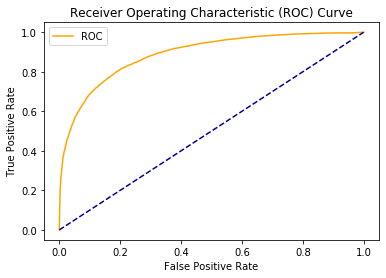

In [99]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

### Two hyper-parameter tuning

In [93]:
model_h2=tree.DecisionTreeClassifier(random_state=100)

max_depth_list=[9,10,11]

min_samples_split_list=list(range(40,80))





paramgrid=[{"min_samples_split":min_samples_split_list,"max_depth":max_depth_list}]                   




gridobj=model_selection.GridSearchCV(estimator=model_h2,param_grid=paramgrid,scoring="f1")

gridobj.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=100),
             param_grid=[{'max_depth': [9, 10, 11],
                          'min_samples_split': [40, 41, 42, 43, 44, 45, 46, 47,
                                                48, 49, 50, 51, 52, 53, 54, 55,
                                                56, 57, 58, 59, 60, 61, 62, 63,
                                                64, 65, 66, 67, 68, 69, ...]}],
             scoring='f1')

In [94]:
gridobj.best_params_

{'max_depth': 11, 'min_samples_split': 46}

In [97]:
bestmodel=gridobj.best_estimator_
testp=bestmodel.predict(X_test)
printmetrics(y_train,trainp)
printmetrics(y_test,testp)

AUC :  0.7703088131253646
accuracy :  0.8705100479983121
recall :  0.5889517523180889
precision :  0.7783778170111123
f1 score :  0.6705435025721315
-----------------------------------------------
AUC :  0.7534066365266673
accuracy :  0.8595942192060199
recall :  0.5596887159533074
precision :  0.7554621848739496
f1 score :  0.643004023245418
-----------------------------------------------


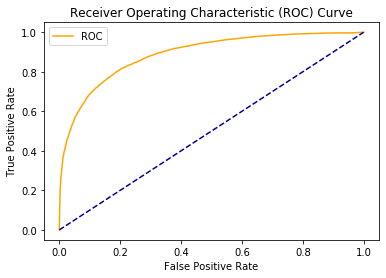

In [98]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

## Random Forest Classifier

In [100]:
from sklearn import ensemble
from sklearn import metrics

In [101]:
model_rf=ensemble.RandomForestClassifier(n_estimators=500, max_depth=11,random_state=100) # creating the model

In [102]:
model_rf.fit(X_train,y_train) # fit the model

RandomForestClassifier(max_depth=11, n_estimators=500, random_state=100)

In [103]:
testp=model_rf.predict(X_test)
trainp=model_rf.predict(X_train)
printmetrics(y_train,trainp)
printmetrics(y_test,testp)

AUC :  0.7902905947658027
accuracy :  0.8918719341737433
recall :  0.6064356435643564
precision :  0.8711479850998984
f1 score :  0.715079916608756
-----------------------------------------------
AUC :  0.7639439422878757
accuracy :  0.873518759450051
recall :  0.5640466926070039
precision :  0.8199095022624434
f1 score :  0.6683264177040111
-----------------------------------------------


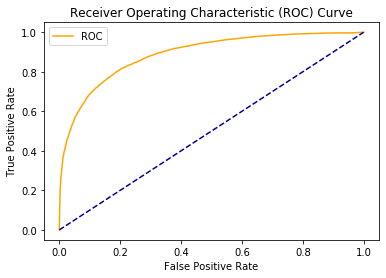

In [104]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

In [105]:
pd.Series(model_rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Humidity3pm      0.315242
Pressure3pm      0.138097
WindGustSpeed    0.080259
RainToday        0.068186
Rainfall         0.055577
Cloud3pm         0.051946
Humidity9am      0.051768
WindGustDir      0.036277
MaxTemp          0.034615
Sunshine         0.033602
MinTemp          0.026252
Location         0.022731
WindSpeed3pm     0.016167
WindDir3pm       0.015104
Cloud9am         0.014738
WindDir9am       0.011631
WindSpeed9am     0.011488
Month            0.008621
Evaporation      0.007701
dtype: float64

In [106]:
X_train.shape

(113754, 19)

In [107]:
from sklearn import feature_selection

In [108]:
rfeobj_rf=feature_selection.RFE(ensemble.RandomForestClassifier(random_state=100),10)
rfeobj_rf.fit(X_train,y_train)

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


RFE(estimator=RandomForestClassifier(max_depth=11, n_estimators=500,
                                     random_state=100),
    n_features_to_select=10)

In [109]:
cols = X_train.columns[rfeobj_rf.support_]
cols

Index(['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'RainToday'],
      dtype='object')

In [110]:
model=ensemble.RandomForestClassifier(n_estimators=500,max_depth=11, random_state=100)
model.fit(X_train[cols],y_train)

trainp=model.predict(X_train[cols])
testp=model.predict(X_test[cols])

print("acc train",metrics.accuracy_score(y_train,trainp))

print("acc test",metrics.accuracy_score(y_test,testp))

print("pres train",metrics.precision_score(y_train,trainp))

print("pres test",metrics.precision_score(y_test,testp))

print("conf test",metrics.confusion_matrix(y_test,testp))

print("conf train",metrics.confusion_matrix(y_train,trainp))

print("auc train",metrics.roc_auc_score(y_train,trainp))

print("auc test",metrics.roc_auc_score(y_test,testp))

print("f1 score train",metrics.f1_score(y_train,trainp))

print("f1 score test",metrics.f1_score(y_test,testp)) 

acc train 0.8876083478383178
acc test 0.8709166988993987
pres train 0.8488570641696502
pres test 0.7992177314211213
conf test [[21090   924]
 [ 2747  3678]]
conf train [[85558  2744]
 [10041 15411]]
auc train 0.787208759145554
auc test 0.7652390360714919
f1 score train 0.7068131263329283
f1 score test 0.6670898703183097
